In [37]:
#import important libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
#load Dataset
data = pd.read_csv(r"demand_data.csv")

In [38]:
# Create pandas DataFrame
data=pd.DataFrame(data)

In [39]:
#Print first few row of Dataset
data.head()

,Date,Product id,Unit Sales,Promotion Type,Unnamed: 4,Seasonal Trend,Unnamed: 6,Economic Indicator,Unnamed: 8,total_price,base_price,store_id
0,01-01-2023,1001,150,New Year Sale,NaN,Winter,NaN,Low Unemployment,NaN,99.0375,111.8625,8091.0
1,02-01-2023,1002,200,New Year Sale,NaN,Winter,NaN,Low Unemployment,NaN,99.0375,99.0375,8091.0
2,03-01-2023,1003,180,New Year Sale,NaN,Winter,NaN,Low Unemployment,NaN,133.9500,133.9500,8091.0
3,04-01-2023,1004,220,New Year Sale,NaN,Winter,NaN,Low Unemployment,NaN,133.9500,133.9500,8091.0
4,05-01-2023,1005,170,New Year Sale,NaN,Winter,NaN,Low Unemployment,NaN,141.0750,141.0750,8091.0


In [40]:
#Print last few row of Dataset
data.tail()

,Date,Product id,Unit Sales,Promotion Type,Unnamed: 4,Seasonal Trend,Unnamed: 6,Economic Indicator,Unnamed: 8,total_price,base_price,store_id
45,15-02-2023,1001,342,Valentine's Day,NaN,Winter,NaN,Low Unemployment,NaN,426.7875,448.1625,8094.0
46,16-02-2023,1002,132,Valentine's Day,NaN,Winter,NaN,Low Unemployment,NaN,426.7875,448.8750,8094.0
47,17-02-2023,1003,324,Valentine's Day,NaN,Winter,NaN,Low Unemployment,NaN,426.7875,448.1625,8094.0
48,18-02-2023,1004,154,Valentine's Day,NaN,Winter,NaN,Low Unemployment,NaN,170.2875,170.2875,8094.0
49,19-02-2023,1005,421,Valentine's Day,NaN,Winter,NaN,Low Unemployment,NaN,NaN,NaN,NaN


In [41]:
#For Data shape
data.shape

(50, 12)

In [ ]:
#Statistical summary of numerical columns
data.describe()

,Product id,Unit Sales,Unnamed: 4,Unnamed: 6,Unnamed: 8,total_price,base_price,store_id
count,50.000000,50.000000,0.0,0.0,0.0,49.000000,49.000000,49.000000
mean,1003.000000,195.060000,NaN,NaN,NaN,202.640816,211.074490,8093.816327
std,1.428571,50.305357,NaN,NaN,NaN,95.789073,101.217801,1.424100
min,1001.000000,132.000000,NaN,NaN,NaN,85.500000,85.500000,8091.000000
25%,1002.000000,161.250000,NaN,NaN,NaN,133.950000,133.950000,8094.000000
50%,1003.000000,182.500000,NaN,NaN,NaN,190.237500,205.912500,8094.000000
75%,1004.000000,210.000000,NaN,NaN,NaN,235.125000,235.837500,8095.000000
max,1005.000000,421.000000,NaN,NaN,NaN,429.637500,458.137500,8095.000000


In [43]:
#info help us to find datatype and non_null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                50 non-null     object 
 1   Product id          50 non-null     int64  
 2   Unit Sales          50 non-null     int64  
 3   Promotion Type      50 non-null     object 
 4   Unnamed: 4          0 non-null      float64
 5   Seasonal Trend      50 non-null     object 
 6   Unnamed: 6          0 non-null      float64
 7   Economic Indicator  50 non-null     object 
 8   Unnamed: 8          0 non-null      float64
 9   total_price         49 non-null     float64
 10  base_price          49 non-null     float64
 11  store_id            49 non-null     float64
dtypes: float64(6), int64(2), object(4)
memory usage: 4.8+ KB


In [ ]:
#drop unnecessary and null values data
data=data.drop(['Unnamed: 4','Unnamed: 6','Unnamed: 8'],axis=1)

In [9]:
data=data.dropna()

In [45]:
#check the missing values in each column
data.isnull().sum()

Date                  0
Product id            0
Unit Sales            0
Promotion Type        0
Seasonal Trend        0
Economic Indicator    0
total_price           1
base_price            1
store_id              1
dtype: int64

<Axes: xlabel='Promotion Type', ylabel='total_price'>

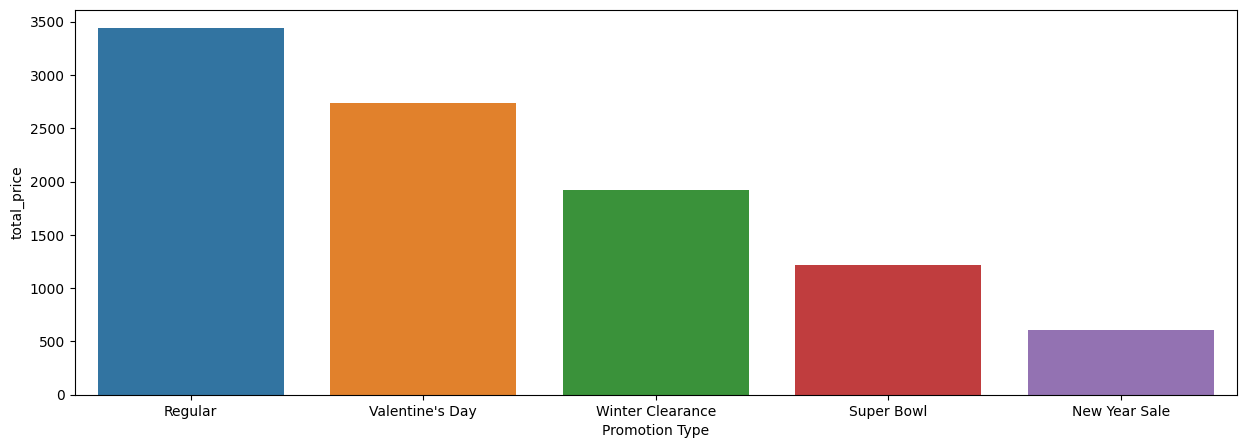

In [46]:
# visualization for analysis
ax=data.groupby(['Promotion Type'],as_index=False)['total_price'].sum().sort_values('total_price',ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(data=ax,x='Promotion Type',y='total_price')

<Axes: xlabel='Seasonal Trend', ylabel='count'>

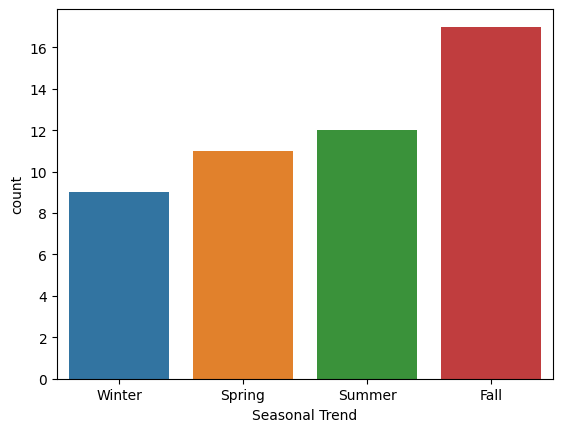

In [12]:
sns.countplot(data=data,x='Seasonal Trend')

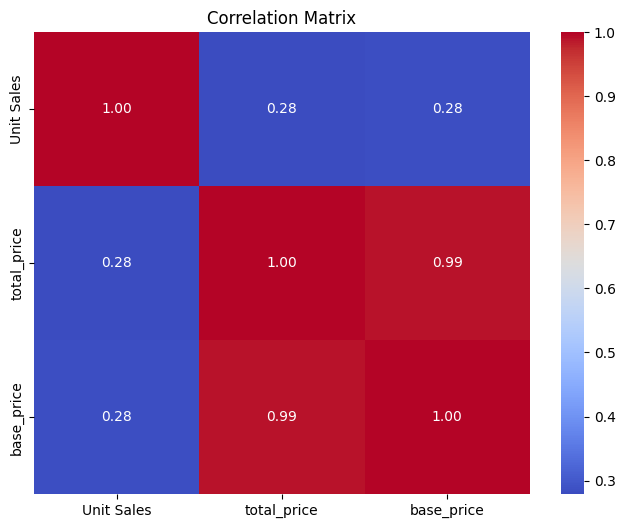

In [47]:
# Correlation matrix
corr = data[['Unit Sales', 'total_price', 'base_price']].corr()

# Plot heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


<Axes: xlabel='store_id', ylabel='count'>

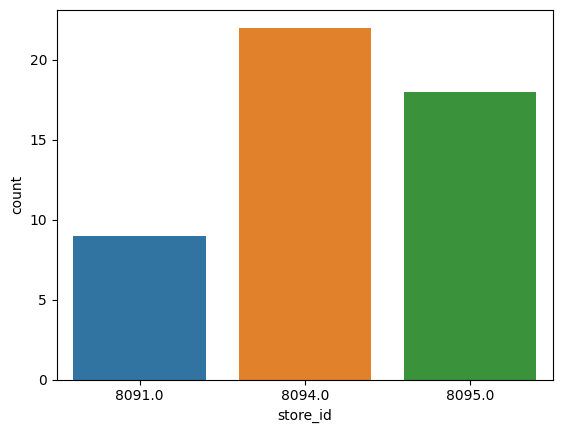

In [50]:
sns.countplot(data=data,x='store_id')

<Axes: xlabel='Seasonal Trend', ylabel='count'>

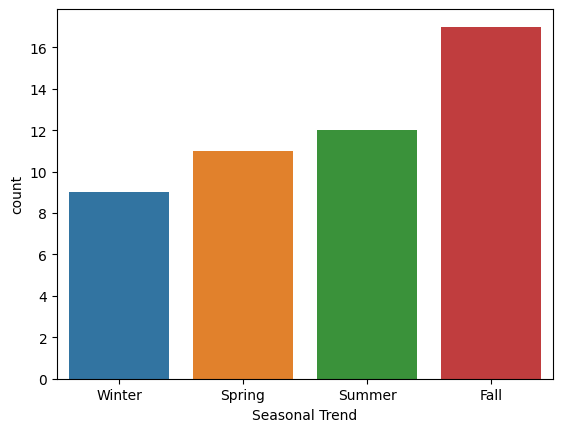

In [17]:
sns.countplot(data=data,x='Seasonal Trend')


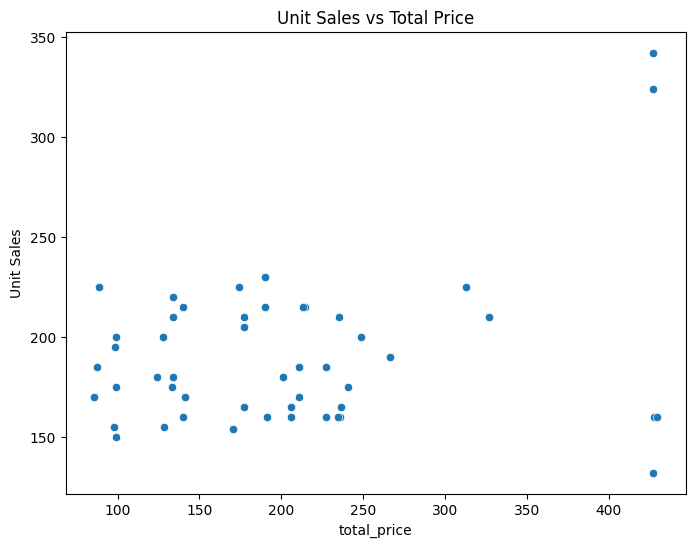

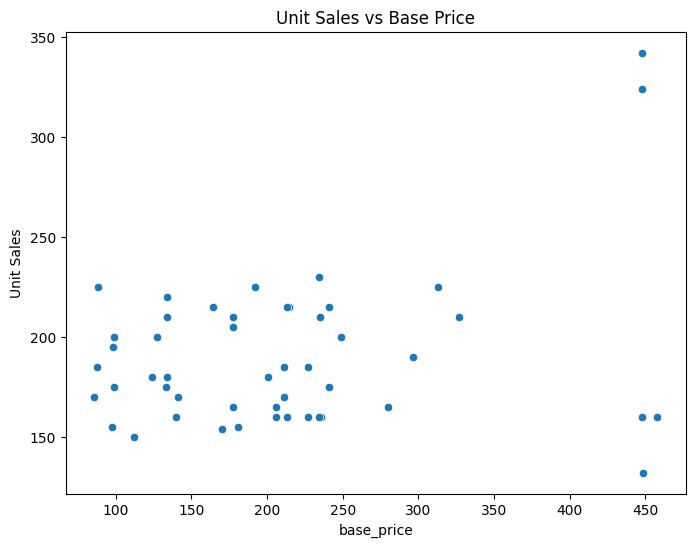

In [18]:
# Scatter plot: Unit Sales vs Total Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_price', y='Unit Sales', data=data)
plt.title('Unit Sales vs Total Price')
plt.show()

# Scatter plot: Unit Sales vs Base Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='base_price', y='Unit Sales', data=data)
plt.title('Unit Sales vs Base Price')
plt.show()



In [48]:
data.columns

Index(['Date', 'Product id', 'Unit Sales', 'Promotion Type', 'Seasonal Trend',
       'Economic Indicator', 'total_price', 'base_price', 'store_id'],
      dtype='object')

In [49]:
# make some column that we use in prediction
data['Date']=pd.to_datetime(data['Date'])
data['dayofdate']=data['Date'].dt.dayofweek

C:\Users\DELL_INSPIRON\AppData\Local\Temp\ipykernel_7244\3070669634.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date']=pd.to_datetime(data['Date'])


In [19]:
label_encoder = LabelEncoder()

# Apply LabelEncoder to the categorical column(s)
data['Promotion Type'] = label_encoder.fit_transform(data['Promotion Type'])
data['Seasonal Trend'] = label_encoder.fit_transform(data['Seasonal Trend'])
data['Economic Indicator'] = label_encoder.fit_transform(data['Economic Indicator'])


In [20]:
#spilt data into feature(x) and target (y)
x=data[['dayofdate', 'Seasonal Trend', 'total_price', 'base_price', 'store_id']]
y=data['Unit Sales']


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
#Split the data into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,train_size=0.3)

In [22]:
#Train a model (Linear Regression in this case)
model=RandomForestRegressor(n_estimators=100, random_state=42)

In [23]:
model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [24]:
#make predictions 
y_pred=model.predict(x_test)

In [28]:
#Print th results 
from sklearn.metrics import mean_absolute_error
mean=mean_absolute_error(y_test,y_pred)
print('mean_absolute_error:-->',mean)
print('Prediction:-->',y_pred[:10])
print('Actual Values:--->',y_test.values[:10])

mean_absolute_error:--> 29.20085714285714
Prediction:--> [197.62 184.79 197.95 164.2  197.6  214.9  178.26 170.68 197.9  199.63]
Actual Values:---> [200 215 165 185 170 154 225 215 160 150]


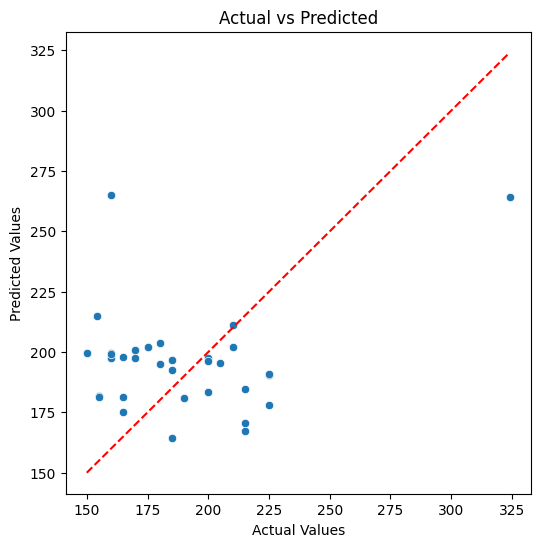

In [52]:
#Visualize Actual and predicted Values
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

Conclusion:--->
'''The sales demand forecasting model achieved a mean absolute error (MAE) of 26, 
meaning the predictions are, on average, 26 units off from the actual demand. 
This shows the model performs reasonably well, but there is room for improvement 
by refining the model or using additional data.'''